# Machine Learning Models

In [1]:
# Imported Modules/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Linear Regression

In [2]:
np.random.seed(42)

In [6]:
# Load dataset and define X and y
df = pd.read_csv(r'../data/QSAR_Final_Dataset.csv') # location relative to my personal location

X_old = df.drop(columns=["pIC50"]) # our data matrix

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X_old)
y = df['pIC50'] # our target vector (pIC50)
    
print(f'The shape of X is: {X.shape}') # check shape of X
print(f'The shape of y is: {y.shape}') # check shape of y

The shape of X is: (65, 49)
The shape of y is: (65,)


In [ ]:
# Define X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.9,
    random_state=42
)

# Formulate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("Test MSE:", mean_squared_error(y_test, y_predicted)) # print test MSE
print("Test R²:", r2_score(y_test, y_predicted)) # print test R^2

Test MSE: 0.516209561224713
Test R²: -0.0005879291218777727


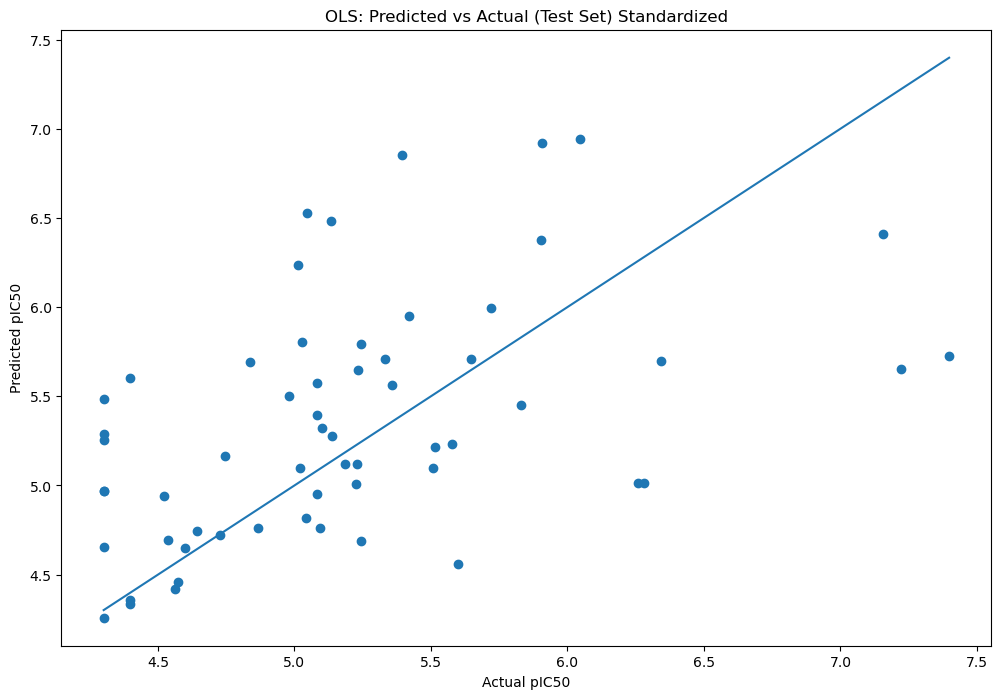

In [ ]:
# Plot linear regression model
y_test_pred = model.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("OLS: Predicted vs Actual (Test Set) Standardized")
plt.show()

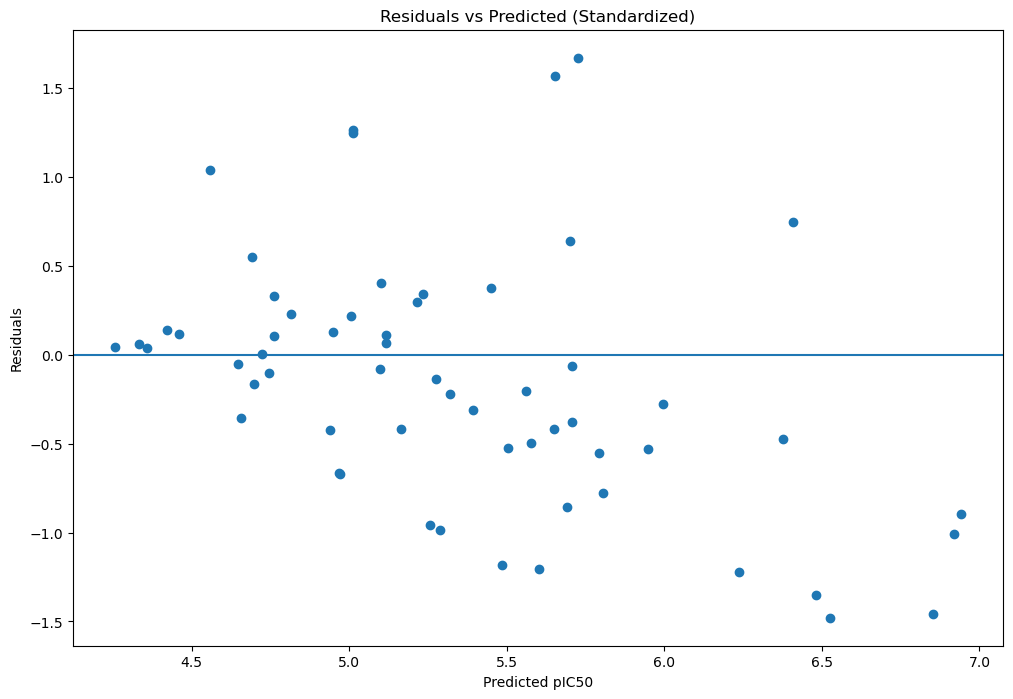

In [ ]:
residuals = y_test - y_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_test_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Standardized)")
plt.show()
